In [28]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
L = (0, 35, 30)
U = (30, 90, 255)

oLower = (0, 35, 30)
oUpper = (30, 255, 255)

# front green
fLower = (30, 10, 10)
fUpper = (90, 255, 255)

#obstacle color    
gLower = (0, 0, 220)
gUpper = (180, 20, 255)

#target color
bLower = (94, 45, 40)
bUpper = (110, 255, 255)
L =bLower
U = bUpper
cL = list(L)
cU = list(U)

In [30]:
colors = []
def my_mouse_callback(event,x,y,flags,frame):
    global evente,h,s,v,i,r,g,b,j
    evente=event
    if event==cv.CV_EVENT_LBUTTONDBLCLK:		# Here event is left mouse button double-clicked
        hsv=cv.CreateImage(cv.GetSize(frame),8,3)
        cv.CvtColor(frame,hsv,cv.CV_BGR2HSV)
        (h,s,v,i)=cv.Get2D(hsv,y,x)
        (r,g,b,j)=cv.Get2D(frame,y,x)
        print ("x,y =",x,y)
        print ("hsv= ",cv.Get2D(hsv,y,x))		# Gives you HSV at clicked point
        print ("im= ",cv.Get2D(frame,y,x)) 	# Gives you RGB at clicked point

def on_mouse_click (event, x, y, flags, hsv):
    if event == cv2.EVENT_LBUTTONUP:
        colors.append(hsv[y,x].tolist())


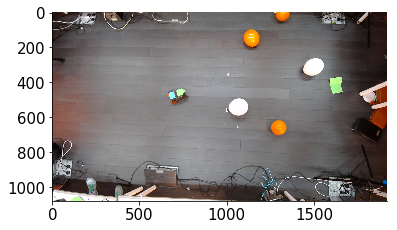

In [31]:
capture = cv2.VideoCapture(1)
_, frame = capture.read()
type(frame)
plt.imshow(frame)

In [32]:
def main():
    capture = cv2.VideoCapture(1)
    while True:
        _, frame = capture.read()
        frame = imutils.resize(frame, width=600)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        if colors:
            cv2.putText(hsv, str(colors[-1]), (10, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 2)


#         cv2.SetMouseCallback("frame",my_mouse_callback)
        cL_ = tuple(cL)
        cU_ = tuple(cU)
        mask = cv2.inRange(hsv, cL_, cU_)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)
        mask = imutils.resize(mask, width=600)
        
        cv2.imshow('hsv', hsv)
        cv2.imshow('frame', frame)
        cv2.imshow('mask', mask)
        cv2.setMouseCallback('frame', on_mouse_click, hsv)

    
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
        if cv2.waitKey(1) & 0xFF == ord('w'):
            cL[0] = cL[0] + 10
            print(cL)
            
        if cv2.waitKey(1) & 0xFF == ord('e'):
            cL[1] = cL[1] + 10
            print(cL)
            
        if cv2.waitKey(1) & 0xFF == ord('r'):
            cL[2] = cL[2] + 10
            print(cL)
            
        if cv2.waitKey(1) & 0xFF == ord('s'):
            cL[0] = cL[0] - 10
            print(cL)
            
        if cv2.waitKey(1) & 0xFF == ord('d'):
            cL[1] = cL[1] - 10
            print(cL)
            
        if cv2.waitKey(1) & 0xFF == ord('f'):
            cL[2] = cL[2] - 10
            print(cL)
            
        #################################################
        if cv2.waitKey(1) & 0xFF == ord('t'):
            cU[0] = cU[0] + 10
            print(cU)
            
        if cv2.waitKey(1) & 0xFF == ord('y'):
            cU[1] = cU[1] + 10
            print(cU)
            
        if cv2.waitKey(1) & 0xFF == ord('u'):
            cU[2] = cU[2] + 10
            print(cU)
            
        if cv2.waitKey(1) & 0xFF == ord('g'):
            cU[0] = cU[0] - 10
            print(cU)
            
        if cv2.waitKey(1) & 0xFF == ord('h'):
            cU[1] = cU[1] - 10
            print(cU)
            
        if cv2.waitKey(1) & 0xFF == ord('j'):
            cU[1] = cU[1] - 10
            print(cU)
            minb = min(c[0] for c in colors)


    capture.release()
    cv2.destroyAllWindows()
                
    minb = min(c[0] for c in colors)
    ming = min(c[1] for c in colors)
    minr = min(c[2] for c in colors)
    maxb = max(c[0] for c in colors)
    maxg = max(c[1] for c in colors)
    maxr = max(c[2] for c in colors)
    print (minr, ming, minb, maxr, maxg, maxb)

    lb = [minb,ming,minr]
    ub = [maxb,maxg,maxr]
    print (lb, ub)


if __name__ == "__main__":
    main()

[94, 55, 40]
[94, 55, 50]
[94, 65, 50]
[110, 255, 265]
[94, 75, 50]
[94, 85, 50]
[94, 95, 50]
[104, 95, 50]
[94, 95, 50]
[110, 265, 265]
[110, 275, 265]
[120, 275, 265]
[110, 275, 265]
127 0 0 255 255 165
[0, 0, 127] [165, 255, 255]


In [ ]:
[110, 275, 265]
[94, 95, 50]
